In [20]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats

In [2]:
# Read csv into data frame
nyc_raw_data = pd.read_csv('nypdcrime.csv')

In [3]:
# Create empty lists to store relevant columns
nyc_date = []
nyc_time = []
nyc_offense = []

# Copy relevant columns to lists
nyc_date.append(nyc_raw_data['CMPLNT_FR_DT'])
nyc_time.append(nyc_raw_data['CMPLNT_FR_TM'])
nyc_offense.append(nyc_raw_data['OFNS_DESC'])

In [4]:
# Build data frame
nyc_crime_data_initial = pd.DataFrame({
    "Date": nyc_date[0],
    "Time": nyc_time[0],
    "Offense": nyc_offense[0]
})

In [5]:
# Remove null values
nyc_crime_data = nyc_crime_data_initial.dropna(subset = ['Offense'])

In [6]:
# Ignore warning created
pd.options.mode.chained_assignment = None

# Strip leading zeros from dates and change date format
nyc_crime_data['Date'] = nyc_crime_data['Date'].apply(lambda x : dt.datetime.strptime(x, '%m/%d/%Y'))

In [9]:
# Read csv into data frame
moon_data = pd.read_csv('moon_phases.csv')

In [10]:
# Change date format
moon_data['Full Date'] = moon_data['Full Date'].apply(lambda x : dt.datetime.strptime(x, '%m/%d/%Y'))

In [11]:
# Merge crime and moon data
nyc_data = nyc_crime_data.merge(moon_data, left_on='Date', right_on='Full Date').drop(['Full Date', 'Year', 'Day', 'Month'], axis=1)

In [12]:
# Count total crimes by date
nyc_date_list = pd.DataFrame(nyc_data.Date.value_counts())

#Rename title to more accurate title
nyc_date_list2 = nyc_date_list.rename(columns={'Date': 'Total Crimes'})

#Rename index title
nyc_date_list2.index.name = 'Date'

# Merge crime counts and previous total data frame
nyc_date_list3 = nyc_data.merge(nyc_date_list2, how='outer', left_on='Date', right_on='Date').drop(['Time', 'Offense', 'Moon Phase'], axis=1)

# Remove duplicate rows
nyc_date_list4 = nyc_date_list3.drop_duplicates()

# Sort data frame by date
nyc_date_list5 = nyc_date_list4.sort_values(by='Date')

# Reset index values
nyc_date_list6 = nyc_date_list5.reset_index(drop=True)

# Display data frame
nyc_date_list6

,Date,Percent Illumination,Total Crimes
0,2015-01-01,84.00%,1920
1,2015-01-02,91.00%,1037
2,2015-01-03,96.00%,1019
3,2015-01-04,99.00%,901
4,2015-01-05,100.00%,1058
5,2015-01-06,99.00%,965
6,2015-01-07,96.00%,970
7,2015-01-08,91.00%,1005
8,2015-01-09,85.00%,1142
9,2015-01-10,78.00%,1069


In [13]:
# Convert percentages to decimals
nyc_date_list6['Percent Illumination'] = nyc_date_list6['Percent Illumination'].str.rstrip('%').astype('float')

In [14]:
# Create percent illumination bins
bins = [0, 3, 10, 21.5, 35.5, 51, 66, 79, 90, 97, 100]
group_name = ['0-3%', '4-10%', '11-21%', '22-35%', '36-50%', '51-65%', '66-78%', '79-89%', '90-96%', '97-100%']
nyc_date_list6['% Illumination'] = pd.cut(nyc_date_list6['Percent Illumination'], 
                                          bins, 
                                          labels = group_name, 
                                          include_lowest=True)

# Group the merged data by school spending
nyc_by_illumination = nyc_date_list6.groupby('% Illumination')

# Calculate average crime
nyc_avg_crime = nyc_by_illumination['Total Crimes'].mean()

# Store illumination bins in a dataframe            
nyc_date_list7 = pd.DataFrame({'Average Crime': nyc_avg_crime})

# Display dataframe
nyc_date_list7

,Average Crime
% Illumination,
0-3%,1307.664062
4-10%,1303.244681
11-21%,1287.420561
22-35%,1292.844037
36-50%,1288.512821
51-65%,1301.205607
66-78%,1275.924528
79-89%,1292.342342
90-96%,1265.805556


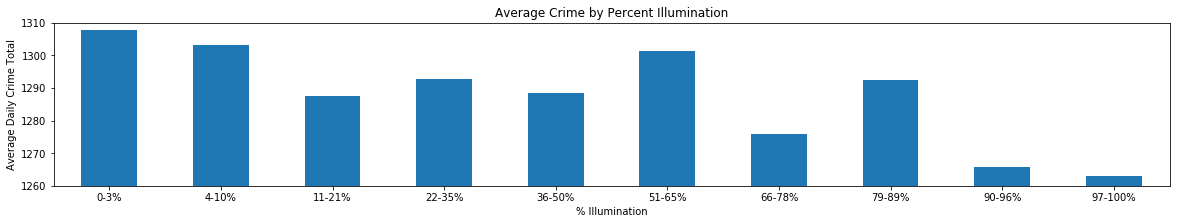

In [15]:
# Create bar graph of data
nyc_date_list7.plot(kind="bar", figsize=(20,3), title='Average Crime by Percent Illumination', legend=False, 
                    ylim=(1260,1310), rot=0)
plt.ylabel('Average Daily Crime Total')

# Save plot
plt.savefig("nyc_avgcrime_percillum.png")

# Show plot
plt.show()

In [17]:
# Calculate average crime
nyc_avg_crime = nyc_date_list6['Total Crimes'].mean()

# Display average crime rate
print(nyc_avg_crime)

1287.962591240876


In [35]:
# Sort the total crimes by day by full moon days only
nyc_full_moon = nyc_date_list6.loc[nyc_date_list6['Percent Illumination'] >= 97.0, :]

# Display dataframe
nyc_full_moon.head()

,Date,Percent Illumination,Total Crimes,% Illumination
3,2015-01-04,99.0,901,97-100%
4,2015-01-05,100.0,1058,97-100%
5,2015-01-06,99.0,965,97-100%
32,2015-02-02,97.0,888,90-96%
33,2015-02-03,99.0,949,97-100%


In [30]:
# Perform t-test to determine rejection or acceptance of null hypothesis
stats.ttest_1samp(nyc_full_moon['Total Crimes'], nyc_avg_crime)

Ttest_1sampResult(statistic=-1.8012874605025793, pvalue=0.07404908005176113)

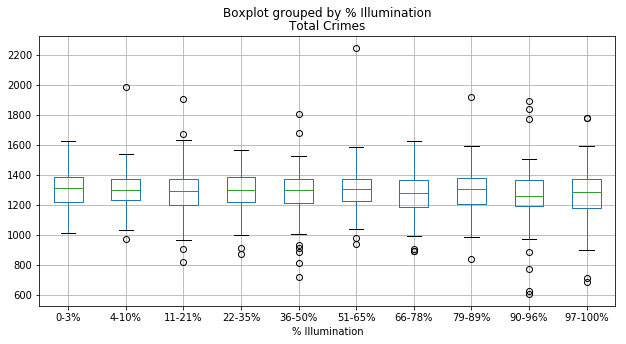

In [34]:
# Create a boxplot to compare means
nyc_date_list6.boxplot("Total Crimes", by="% Illumination", figsize=(10, 5))

# Save boxplot to image
plt.savefig('nyc_boxplot.png')

In [36]:
# Adding a new column to display range for each date
nyc_date_list6['% Illumination'] = pd.cut(nyc_date_list6['Percent Illumination'], 
                                      bins, 
                                      labels = group_name, 
                                      include_lowest=True)
# Verify length of data frame
print(len(nyc_date_list6))

# Display data frame
nyc_date_list6.head()

1096


,Date,Percent Illumination,Total Crimes,% Illumination
0,2015-01-01,84.0,1920,79-89%
1,2015-01-02,91.0,1037,90-96%
2,2015-01-03,96.0,1019,90-96%
3,2015-01-04,99.0,901,97-100%
4,2015-01-05,100.0,1058,97-100%


In [37]:
# Extract individual groups
nycgroup1 = nyc_date_list6[nyc_date_list6["% Illumination"] == "0-3%"]["Total Crimes"]
nycgroup2 = nyc_date_list6[nyc_date_list6["% Illumination"] == "4-10%"]["Total Crimes"]
nycgroup3 = nyc_date_list6[nyc_date_list6["% Illumination"] == "11-21%"]["Total Crimes"]
nycgroup4 = nyc_date_list6[nyc_date_list6["% Illumination"] == "22-35%"]["Total Crimes"]
nycgroup5 = nyc_date_list6[nyc_date_list6["% Illumination"] == "36-50%"]["Total Crimes"]
nycgroup6 = nyc_date_list6[nyc_date_list6["% Illumination"] == "51-65%"]["Total Crimes"]
nycgroup7 = nyc_date_list6[nyc_date_list6["% Illumination"] == "66-78%"]["Total Crimes"]
nycgroup8 = nyc_date_list6[nyc_date_list6["% Illumination"] == "79-89%"]["Total Crimes"]
nycgroup9 = nyc_date_list6[nyc_date_list6["% Illumination"] == "90-96%"]["Total Crimes"]
nycgroup10 = nyc_date_list6[nyc_date_list6["% Illumination"] == "97-100%"]["Total Crimes"]

In [38]:
# Perform the ANOVA
stats.f_oneway(nycgroup1, nycgroup2, nycgroup3, nycgroup4, nycgroup5, nycgroup6, nycgroup7, nycgroup8, nycgroup9, nycgroup10)

F_onewayResult(statistic=1.1433911914236847, pvalue=0.3286825791009984)

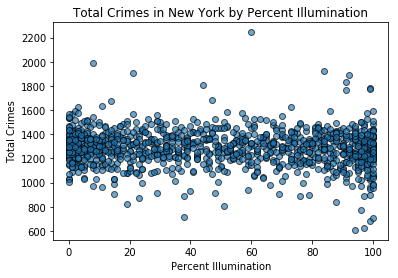

<Figure size 432x288 with 0 Axes>

In [40]:
# Scatter plots for total crimes by percent illumination
plt.scatter(nyc_date_list6['Percent Illumination'], nyc_date_list6['Total Crimes'],
           marker ='o', edgecolors='black', alpha = 0.65, linewidth = 1)
plt.title('Total Crimes in New York by Percent Illumination')
plt.xlabel('Percent Illumination')
plt.ylabel('Total Crimes')
plt.show()

# Save plot
plt.savefig('nyc_total_crimes_scatter.png')

In [41]:
# Export to csv
nyc_date_list6.to_csv('nyc_summary.csv')